<a href="https://colab.research.google.com/github/NahiyanNashrah/Practice-ML/blob/master/MultiVariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()

Saving dataset.txt to dataset (4).txt


In [151]:
data = np.loadtxt('dataset.txt', delimiter=',')
X_train = data[:,[0,1]] #feature set
y_train = data[:,2] #label set


In [152]:
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]


In [153]:
mean

array([2000.68085106,    3.17021277])

In [154]:
std

array([7.86202619e+02, 7.52842809e-01])

In [155]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h


In [156]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost


In [157]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost


In [158]:
# calling the principal function with learning_rate = 0.0001 and 
# num_iters = 300000
theta, cost = linear_regression(X_train, y_train,0.0001, 300000)


In [159]:
theta

array([[340412.65957418, 109447.6892473 ,  -6578.24763182]])

Text(0, 0.5, 'Cost')

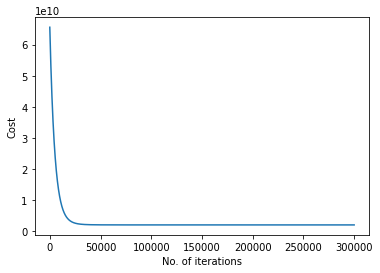

In [160]:
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,300001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')


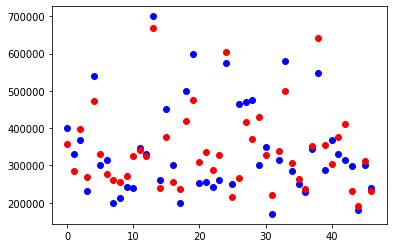

In [144]:
# Getting the predictions...
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train)
                         ,axis = 1)
predictions = hypothesis(theta, X_train, X_train.shape[1] - 1)
# from matplotlib import pyplot
# from mpl_toolkits.mplot3d import Axes3D
# sequence_containing_x_vals = list(X_train.transpose()[1])
# sequence_containing_y_vals = list(X_train.transpose()[2])
# sequence_containing_z_vals = list(predictions)
# fig = pyplot.figure()
# ax = Axes3D(fig)
# ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
#            sequence_containing_z_vals)
# ax.set_xlabel('Living Room Area', fontsize=10)
# ax.set_ylabel('Number of Bed Rooms', fontsize=10)
# ax.set_zlabel('Housing Price Predictions', fontsize=10)
plt.figure()
plt.scatter(x=list(range(0, 47)),y= y_train, color='blue')         
plt.scatter(x=list(range(0, 47)), y=predictions, color='red')
plt.show()


Text(0.5, 0, 'Actual Housing Price')

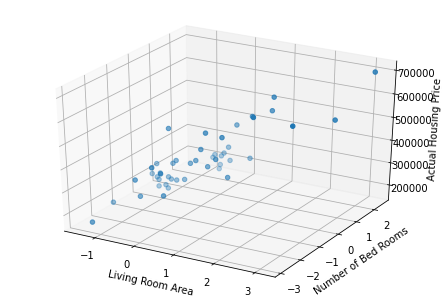

In [161]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_train.transpose()[0])
sequence_containing_y_vals = list(X_train.transpose()[1])
sequence_containing_z_vals = list(y_train)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('Living Room Area', fontsize=10)
ax.set_ylabel('Number of Bed Rooms', fontsize=10)
ax.set_zlabel('Actual Housing Price', fontsize=10)

Text(0.5, 0, 'Housing Price Predictions')

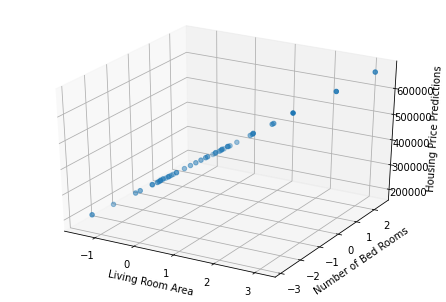

In [162]:
# Getting the predictions...
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train)
                         ,axis = 1)
predictions = hypothesis(theta, X_train, X_train.shape[1] - 1)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_train.transpose()[1])
sequence_containing_y_vals = list(X_train.transpose()[2])
sequence_containing_z_vals = list(predictions)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('Living Room Area', fontsize=10)
ax.set_ylabel('Number of Bed Rooms', fontsize=10)
ax.set_zlabel('Housing Price Predictions', fontsize=10)


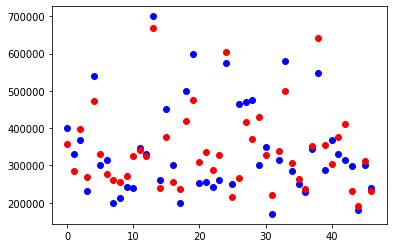

In [163]:
plt.figure()
plt.scatter(x=list(range(0, 47)),y= y_train, color='blue')         
plt.scatter(x=list(range(0, 47)), y=predictions, color='red')
plt.show()